   #            Microsoft Movie Recommendation Analysis    #

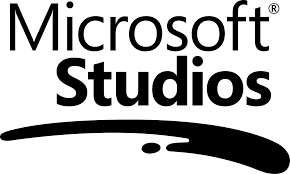

# __Overview__:

This project anaylyzes movie data from the following datasets:__[Box Office Mojo](https://www.boxofficemojo.com/)__, __[IMDB](https://www.imdb.com/)__, __[Rotten Tomatoes](https://www.rottentomatoes.com/)__,__[TheMovieDB](https://www.themoviedb.org/)__,
and __[The Numbers](https://www.the-numbers.com/)__. The intention behind investigating this data is to provide executable business strategies for Microsoft's new movie studio. Descriptive analysis of movie data shows that the highest grossing movies have a correlated relationship to movie rating, the length of the movie and the budget of the movie. Microsoft's new studio executives can use this analysis as the framework for making new profitable movies.

## __Business Problem__:
Microsoft is preparing to enter the unfamiliar movie industry. In order to prevent capital loss, I will analyze movie data to see what basic guidelines Microsoft producers/writers should follow to increase profit. 


## Business Value:
After analyzing movie data I have discovered a framework for movies that is highly likely to increase the gross revenue.

## __Data Understanding__:

The websites listed above contained 10 usable data sets. From those I used the following four data sets. The data sets provide information on domestic and worldwide gross, movie ratings, production budget, movie length, and other movie details (e.g. release date,etc.).

# Obtain

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
budget_and_profit = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
movie_profits_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
additional_movie_info_df = pd.read_csv("zippedData/imdb.title.basics.csv.gz")
descriptive_movie_info_df = pd.read_csv("zippedData/rt.movie_info.tsv.gz",sep='\t')

# Explore

The movie datasets include thousands of movies ranging from 1962 all the way to future films scheduled up to 2026 with titles,dates, profits, and othe relevant information.

In [3]:
budget_and_profit.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [4]:
movie_profits_df.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [5]:
additional_movie_info_df.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [6]:
descriptive_movie_info_df.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


### __Data Preparation__

In [7]:
import sys
sys.path.append('/Users/johnwelsh/Documents/Flatiron/courseMaterials/phase_1/project_one/dsc-phase-1-project/code')
import data_preparation as dp

# Scrub

### __Data Cleaning__
__BOLD__ denotes a __dataframe__



#### 
To start I clean the columns of ___budget_and_profit___ so the budget,domestic_gross,and worldwide_gross columns are now integer data types. I do this by setting each column
to the function change_cols_to_int() with the own column as the parameter. This function
removes the ',' and sets the type as int.

In [8]:
budget_and_profit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [9]:
budget_and_profit.production_budget = \
dp.change_cols_to_int(budget_and_profit.production_budget)

budget_and_profit.domestic_gross = \
dp.change_cols_to_int(budget_and_profit.domestic_gross)

budget_and_profit.worldwide_gross = \
dp.change_cols_to_int(budget_and_profit.worldwide_gross)


In [10]:
budget_and_profit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


#### 
Then I do the same for __movie_profits_df__. The domestic_gross column
is a float type so I clean it without a function. However there are 28 NaN values
that I need to deal with first. I discover that these are of the type np.nan i.e
float. I decide to replace the NaN values with the mean of the domestic_gross
column because the NaN values only take up .0083 of the entire column.

In [11]:
movie_profits_df.domestic_gross.isna().value_counts()

False    3359
True       28
Name: domestic_gross, dtype: int64

In [12]:
nan_vals = movie_profits_df.loc[movie_profits_df.domestic_gross.isna()==True]

In [13]:
mean = movie_profits_df.domestic_gross.mean()
for element in nan_vals.index:
    movie_profits_df.domestic_gross = mean


In [14]:
movie_profits_df.domestic_gross.isna().value_counts()

False    3387
Name: domestic_gross, dtype: int64

#### 
Now that I have replaced the NaN values in movie_profits_df.domestic_gross I need to cast the type to integer. 

In [15]:
movie_profits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [16]:
movie_profits_df.domestic_gross = movie_profits_df.domestic_gross.astype('int64')

In [17]:
movie_profits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3387 non-null   object
 1   studio          3382 non-null   object
 2   domestic_gross  3387 non-null   int64 
 3   foreign_gross   2037 non-null   object
 4   year            3387 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 132.4+ KB


#### 
Then I found that there are n/a values within movie_profits_df.foreign_gross column. 
This time there are 1350. So I will remove every index from the dataframe that has
a NaN value associated in the foreign_gross column.

In [18]:
movie_profits_df.foreign_gross.isna().value_counts()

False    2037
True     1350
Name: foreign_gross, dtype: int64

In [19]:
nan_vals = movie_profits_df.loc[movie_profits_df.foreign_gross.isna()==True]
nan_vals.head(2)

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,28745845,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,28745845,NaN,2010


In [20]:
for idx in nan_vals.index:
    movie_profits_df.drop([idx],inplace=True)

In [21]:
movie_profits_df.foreign_gross.isna().value_counts()

False    2037
Name: foreign_gross, dtype: int64

#### 
Now, I just need to cast the foreign_gross column to an integer. I find that
this column has both ',' and '.' with a following decimal value. First I remove
the ',' characters because there are not that many of them (5).

In [22]:
movie_profits_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2037 non-null   object
 1   studio          2033 non-null   object
 2   domestic_gross  2037 non-null   int64 
 3   foreign_gross   2037 non-null   object
 4   year            2037 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 95.5+ KB


In [23]:
movie_profits_df.loc[movie_profits_df.foreign_gross.str.contains(',')].shape

(5, 5)

In [24]:
movie_profits_df.foreign_gross = movie_profits_df.foreign_gross.replace(',','',regex=True)

In [25]:
movie_profits_df.loc[movie_profits_df.foreign_gross.str.contains(',')].shape

(0, 5)

#### 
Then I will remove the decimal and any following digits. Removing the tailing
decimals is okay because the value range is in the billions.

In [26]:
movie_profits_df.loc[movie_profits_df.foreign_gross.str[-2]=='.'].shape

(5, 5)

In [27]:
indices = movie_profits_df.loc[movie_profits_df.foreign_gross.str[-2]=='.'].index
for idx in indices:
    length = len(movie_profits_df.foreign_gross[idx])
    old_val = movie_profits_df.foreign_gross[idx][0:length]
    new_val = movie_profits_df.foreign_gross[idx][0:-2]   
    movie_profits_df.foreign_gross = \
    movie_profits_df.foreign_gross.replace(old_val,new_val,regex=True)
   
    

In [28]:
movie_profits_df.loc[movie_profits_df.foreign_gross.str[-2]=='.'].shape

(0, 5)

#### 
Next, I need to cast the movie_profits_df.foreign_gross to integer.


In [29]:
movie_profits_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2037 non-null   object
 1   studio          2033 non-null   object
 2   domestic_gross  2037 non-null   int64 
 3   foreign_gross   2037 non-null   object
 4   year            2037 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 175.5+ KB


In [30]:
movie_profits_df.foreign_gross = movie_profits_df.foreign_gross.astype('int64')

In [31]:
movie_profits_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2037 non-null   object
 1   studio          2033 non-null   object
 2   domestic_gross  2037 non-null   int64 
 3   foreign_gross   2037 non-null   int64 
 4   year            2037 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 175.5+ KB


#### 
Then, I aggregate a unique, not NaN, common list of movie titles from both __movie_profits_df__ and __budget_and_profit__. I do this by passing the two dataframes into the list_common_titles() function. This function gets the movie titles that exist in
both of the provided dataframes and returns a cleaned list. This list is important
because it has a unique list of all the movies in both the dataframes that have 
valid data for domestic_gross and worldwide_gross i.e. not NaN.

In [32]:
unique_names = dp.list_common_titles(movie_profits_df,budget_and_profit)

#### 
The data in __additional_movie_info_df__ has movie titles associated with runtime
(min) but 31739 of the runtime values are NaN. So, I also make a list of movie 
titles that have an associated runtime from __additional_movie_info_df__ called better_runtime_titles. I do this by calling the list_of_titles_with_runtime()
function which returns a cleaned list of movie titles in the dataframe that have an associated runtime i.e. not NaN.



In [33]:
additional_movie_info_df.runtime_minutes.isna().value_counts()

False    114405
True      31739
Name: runtime_minutes, dtype: int64

In [34]:
better_runtime_titles = dp.list_of_titles_with_runtime(additional_movie_info_df)
len(better_runtime_titles)

114405

#### 
Then I take the two lists to make a list of movie titles that have an associated runtime(min),domestic gross, and worldwide gross in a list called known_titles.
This new list checks titles that have an associated runtime i.e. better_
runtime_titles and if the title is in the list of titles with domestic/worldwide
gross i.e. unique_names then it is addedd to known_titles. This means that 
known_titles is a list of movie titles that have non-NaN values for 
domestic/worldwide gross and runtime data. 

In [35]:
known_titles=[]
for title in better_runtime_titles:
    
    if title in unique_names:
        known_titles.append(title)
known_titles = list(set(known_titles))
len(known_titles)

2765

#### 
After that, I investigate the __descriptive_movie_info_df__ with the intention
of comparing box_office amount to rating. I find that the box_office column is
a string and there 1220 NaN values. So I remove NaN values, replace the ',' and cast the column type to an integer.

In [36]:
descriptive_movie_info_df.box_office.isna().value_counts()

True     1220
False     340
Name: box_office, dtype: int64

In [37]:
descriptive_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [38]:
dmi_df=descriptive_movie_info_df.copy()
dmi_df=dmi_df.loc[dmi_df.box_office.isna() == False]
dmi_df.box_office=dmi_df.box_office.apply(lambda x: int(x.replace(',','')))

In [39]:
dmi_df.box_office.isna().value_counts()

False    340
Name: box_office, dtype: int64

In [40]:
dmi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 1 to 1555
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            340 non-null    int64 
 1   synopsis      340 non-null    object
 2   rating        340 non-null    object
 3   genre         340 non-null    object
 4   director      299 non-null    object
 5   writer        273 non-null    object
 6   theater_date  334 non-null    object
 7   dvd_date      334 non-null    object
 8   currency      340 non-null    object
 9   box_office    340 non-null    int64 
 10  runtime       338 non-null    object
 11  studio        305 non-null    object
dtypes: int64(2), object(10)
memory usage: 34.5+ KB


#### 
Now I need to make cleaned version of additional_movie_info_df where there are 
no NaN values in the runtime_minutes column.

In [41]:
additional_movie_info_df.runtime_minutes.isna().value_counts()

False    114405
True      31739
Name: runtime_minutes, dtype: int64

In [42]:
clean_movie_info_df = additional_movie_info_df.dropna()

In [43]:
clean_movie_info_df.runtime_minutes.isna().value_counts()

False    112232
Name: runtime_minutes, dtype: int64

### __Merging Datasets__


#### 
 Following up on inspecting the relationship between runtime and domestic/worldwide
 gross I decide to make a dataframe with the known_titles list. The dataframe 
 has a Title, runtime, domestic_gross, and worldwide_gross columns. I call this
 data frame __run_df__. After constructing the dataframe with known_titles as the
 title column I still need to put the relevant values into the other columns.
 
 

In [44]:

run_df=pd.DataFrame({
    'Title':known_titles,
    'runtime': None,
    'domestic_gross': None,
    'worldwide_gross': None
  
})



In [45]:
len(known_titles)

2765

#### 
Now I will fill the columns with the appropriate data. I will start with 
runtime. First I call construct_runtime_col function(). This function returns
a list of movie titles in known_titles and additional_movie_info_df.primary_title.
This is where I will use __clean_movie_info_df__. First I assign the list to a value called tester which is a list of data frames. I discover some of the data frames in the list have multiple values because of duplicate title names. To fix this I loop through tester and remove extra rows in the data frames with multiple elements. Then I assign tester.runtime_minutes to __run_df__.runtime and cast each element to an integer.


In [46]:
tester = dp.construct_runtime_col(clean_movie_info_df, known_titles)

In [47]:
len(tester)

2761

In [48]:
#How many elements in tester have >1 indices
info = []
for element in tester:
    if len(element)>1:
        info.append(element)
print("Elements with '>1' indices:  "+str(len(info)))
info[0]


Elements with '>1' indices:  514


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
7063,tt1374992,Upside Down,Upside Down,2012,109.0,"Drama,Fantasy,Romance"
28583,tt2105043,Upside Down,Upside Down,2012,81.0,Drama
87946,tt5105628,Upside Down,Upside Down,2015,70.0,"Biography,Documentary,Family"


In [49]:
for el in tester:
    #In this level el = a dataframe that may contain multiple elements
    if len(el)>1:
        counter = 0
        indices = el.index
        for idx in indices:
            if counter == 0:
                counter+=1
            else:
                el.drop([idx],inplace=True)
                         
            
            

In [50]:
#How many elements in tester have >1 indices
info = []
for element in tester:
    if len(element)>1:
        info.append(element)
print("Elements with '>1' indices:  "+str(len(info)))


Elements with '>1' indices:  0


In [51]:
len(tester)

2761

In [52]:
#Adding tester to run_df.runtime
idx = 0
for element in tester:
    run_df.runtime[idx] = int(element.runtime_minutes)
    idx += 1

In [53]:
run_df.head(2)

,Title,runtime,domestic_gross,worldwide_gross
0,When the Bough Breaks,107,None,None
1,We Need to Talk About Kevin,112,None,None


#### 
Now I will follow a similar process to add the domestic_gross column values.
Similar to runtime, I discover 59 elements with more than one row. I will clean
them the same way as above.

In [54]:
tester = dp.construct_gross_col(budget_and_profit, movie_profits_df, known_titles)

In [55]:
info = []
for el in tester:
    if len(el)>1:
        info.append(el)

In [56]:
print("Elements with '>1' indices:  "+str(len(info)))
info[1]

Elements with '>1' indices:  59


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
96,97,"Apr 15, 2016",The Jungle Book,175000000,364001123,962854547
2095,96,"Dec 25, 1994",The Jungle Book,27000000,44342956,44342956


In [57]:
count = 0
for el in tester:
    #In this level el = a dataframe that may contain multiple elements
    if len(el)>1:
        wu = el.copy()
  
        counter=0
        idx=wu.index
        for idx in idx:
            if counter ==0:
                counter+=1
            else:
                wu.drop([idx],inplace=True)
        tester[count] = wu.copy()
        count+=1
    else:
        count+=1
            
       
                         

In [58]:
info = []
for el in tester:
    if len(el)>1:
        info.append(el)
print("Elements with '>1' indices:  "+str(len(info)))

Elements with '>1' indices:  0


In [59]:
idx = 0
for element in tester:
    run_df.domestic_gross[idx] = int(element.domestic_gross)
    idx += 1

In [60]:
run_df.head(5)

,Title,runtime,domestic_gross,worldwide_gross
0,When the Bough Breaks,107,29747603,None
1,We Need to Talk About Kevin,112,1738692,None
2,Upside Down,109,102118,None
3,Mary Queen of Scots,119,16468499,None
4,King Arthur: Legend of the Sword,126,39175066,None


#### 
Now I will finish the data frame by constructing the worldwide_gross column.
I will do it in the same manner as the above columns. The tester value from
above already has the values I need. The only fix I need to account for is
that 558 of the dataframe rows in tester have a column foreign_gross while
other have worldwide_gross.


In [61]:
info = []
for el in tester:
    if el.columns[-1] != 'worldwide_gross':
        info.append(el)
print(len(info))
info[0]

558


,title,studio,domestic_gross,foreign_gross,year
1661,A Letter to Momo,GK,28745845,6700000,2014


In [62]:
tester[2000].columns[-1]

'year'

In [63]:
idx = 0
for element in tester:
    if element.columns[-1] == 'worldwide_gross':
        run_df.worldwide_gross[idx] = int(element.worldwide_gross)
        idx += 1
    elif element.columns[-1] == 'foreign_gross':    
        run_df.worldwide_gross[idx] = int(element.foreign_gross)
        idx += 1
    
    

In [64]:
run_df.head()

,Title,runtime,domestic_gross,worldwide_gross
0,When the Bough Breaks,107,29747603,30768449
1,We Need to Talk About Kevin,112,1738692,10765283
2,Upside Down,109,102118,26387039
3,Mary Queen of Scots,119,16468499,46734733
4,King Arthur: Legend of the Sword,126,39175066,139630336


#### 
I then discover that there are only 2206 valid worldwide_gross vals. So I will
remove rows[2207] through row[2764].

In [65]:
run_df.tail()

,Title,runtime,domestic_gross,worldwide_gross
2760,Holy Rollers,9,28745845,None
2761,Letters to God,None,2848587,None
2762,Lean on Pete,None,1163056,None
2763,The Perfect Match,None,9669521,None
2764,Suspiria,None,2483472,None


In [66]:
print(run_df.worldwide_gross[2203:2210])

2203     3237452
2204     2455027
2205    10182050
2206     7034615
2207        None
2208        None
2209        None
Name: worldwide_gross, dtype: object


In [67]:
x = range(2207,2765)
for idx in x:
    run_df.drop([idx],inplace=True)

In [68]:
run_df.tail()

,Title,runtime,domestic_gross,worldwide_gross
2202,The Zero Theorem,119,28745845,35609577
2203,Wonder Boys,142,19389454,3237452
2204,Damsels in Distress,88,1007535,2455027
2205,Another Happy Day,71,9120,10182050
2206,I Saw the Devil,120,28745845,7034615


#### 
The last thing to do is remove zero values. I can assume that a zero value is incorrect
So they will only hurt the conclusions. There are 417 of these rows. So after removing
these elements there will be 1790 rows left to analyze.

In [69]:
print("The number of zeros in this column are:"+
      str(run_df.loc[run_df.domestic_gross == 0].shape[0]))


The number of zeros in this column are:237


In [70]:
print("The number of zeros in this column are:"+
      str(run_df.loc[run_df.worldwide_gross == 0].shape[0]))

The number of zeros in this column are:204


In [71]:
print("The number of zeros in these columns are:"+
      str(run_df.loc[(run_df.worldwide_gross == 0) & \
          (run_df.domestic_gross == 0)].shape[0]))

The number of zeros in these columns are:23


In [72]:
to_remove = run_df.loc[(run_df.worldwide_gross == 0) & \
          (run_df.domestic_gross == 0)].index
for idx in to_remove:
    run_df.drop([idx],inplace=True)

In [73]:
print("The number of zeros in this column are:"+
      str(run_df.loc[(run_df.worldwide_gross == 0) & \
          (run_df.domestic_gross == 0)].shape[0]))

The number of zeros in this column are:0


In [74]:
to_remove = run_df.loc[run_df.domestic_gross == 0].index
for idx in to_remove:
    run_df.drop([idx],inplace=True)

print("The number of zeros in this column are:"+
      str(run_df.loc[run_df.domestic_gross == 0].shape[0]))

The number of zeros in this column are:0


In [75]:
run_df.shape

(1970, 4)

In [76]:
run_df.head(3)

,Title,runtime,domestic_gross,worldwide_gross
0,When the Bough Breaks,107,29747603,30768449
1,We Need to Talk About Kevin,112,1738692,10765283
2,Upside Down,109,102118,26387039


#### 
Lastly, I cast all of the types into integers.

In [77]:
run_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2206
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            1970 non-null   object
 1   runtime          1970 non-null   object
 2   domestic_gross   1970 non-null   object
 3   worldwide_gross  1970 non-null   object
dtypes: object(4)
memory usage: 77.0+ KB


In [78]:
run_df.runtime = run_df.runtime.astype('int64')
run_df.domestic_gross = run_df.domestic_gross.astype('int64')
run_df.worldwide_gross = run_df.worldwide_gross.astype('int64')

In [79]:
run_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2206
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            1970 non-null   object
 1   runtime          1970 non-null   int64 
 2   domestic_gross   1970 non-null   int64 
 3   worldwide_gross  1970 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 77.0+ KB


### __Feature Engineering__


#### 
The first features I prepare are average domestic and worldwide gross values
in the __run_df__. I get the averages based on runtime in 10 minute intervals
starting with 30 and ending at 200. I do this by calling the function populate_average_world().
The function is only a few lines of code so I put the code in comments below. Basically,
the function returns the mean of a loc statement checking for runtime movies within
[count:count+60]. I have another function called populate_average_dom() that does
the same thing but for domestic gross values. Then I set the list index to the
x-axis labels I will use during visualization.

In [80]:
index = ['>60','[60-120)','[120,180)']

In [81]:
avg_world = dp.populate_average_world(run_df,60)
avg_dom = dp.populate_average_dom(run_df,60)



#average = []
#    i = start_val
#    while i != 200:
#        average.append( df.loc[(df.runtime>=i) & (df.runtime<i+10)].\
#    worldwide_gross.mean())
#        i+=10
    
#    return average[0:16]

#### 
Next, I get the average box_office value based on rating using the loc statement.

In [82]:

r = dmi_df.loc[dmi_df.rating=='R'].box_office.mean()

pg_13 = dmi_df.loc[dmi_df.rating=='PG-13'].box_office.mean()

pg = dmi_df.loc[dmi_df.rating=='PG'].box_office.mean()

g =  dmi_df.loc[dmi_df.rating=='G'].box_office.mean()

## __Analysis__


In [83]:
import visualizations as viz

### __Budget__


#### 
The first thing I investigate is the relationship between production budget
and domestic/worldwide gross. I only need __budget_and_profit__. First I call
the function budget_corr which returns the correlation between production_budget
and domestic/worldwide gross. Then I plot two scatter plots showing the relationships.


In [84]:
viz.budget_corr(budget_and_profit)

domestic_gross     0.685682
worldwide_gross    0.748306
Name: production_budget, dtype: float64

Text(0.5, 1.0, 'Domestic Gross vs Production Budget')

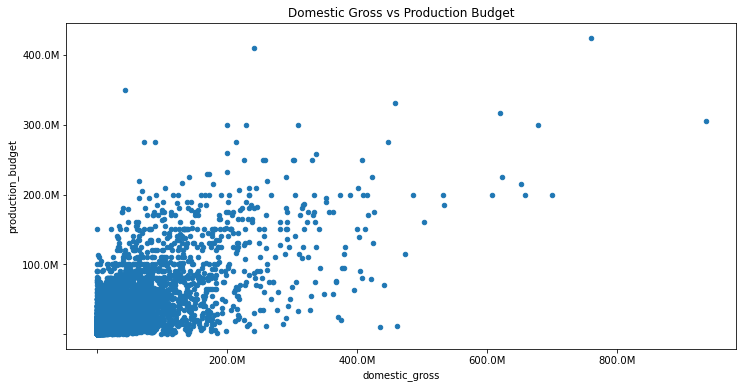

In [85]:
ax=budget_and_profit.plot.scatter(x='domestic_gross',y = 'production_budget',\
                                 figsize=(12,6))
ax.xaxis.set_major_formatter(dp.format_num)
ax.yaxis.set_major_formatter(dp.format_num)
ax.set_title('Domestic Gross vs Production Budget')

Text(0.5, 1.0, 'Worldwide Gross vs Production Budget')

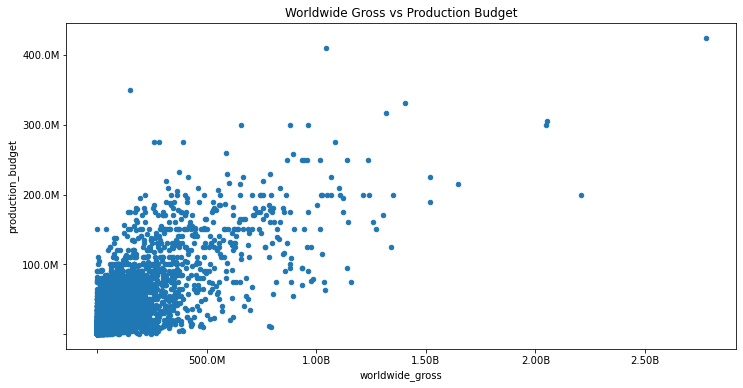

In [86]:
ax = budget_and_profit.plot.scatter(x='worldwide_gross',y = 'production_budget',\
                                 figsize=(12,6))
ax.xaxis.set_major_formatter(dp.format_num)
ax.yaxis.set_major_formatter(dp.format_num)
ax.set_title('Worldwide Gross vs Production Budget')

### __Runtime__


#### 
First I plot all of the data points in run_df to get an idea of possible findings.

Text(0.5, 1.0, 'Runtime vs Worldwide Gross ')

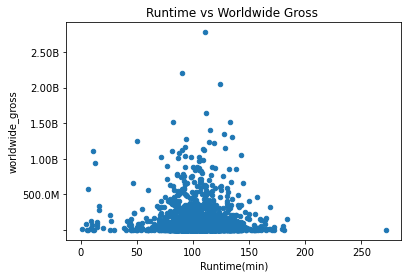

In [87]:
x_lab= "Runtime(min)"
ax = run_df.plot.scatter(x='runtime',y='worldwide_gross')
ax.yaxis.set_major_formatter(dp.format_num)
ax.set_xlabel(x_lab)
ax.set_title("Runtime vs Worldwide Gross ")

#### 
I do the same for domestic gross.

Text(0.5, 1.0, 'Runtime vs Domestic Gross ')

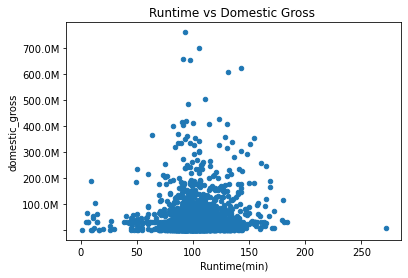

In [88]:
ax = run_df.plot.scatter(x='runtime',y='domestic_gross')
ax.yaxis.set_major_formatter(dp.format_num)
ax.set_xlabel(x_lab)
ax.set_title("Runtime vs Domestic Gross ")

#### 
The bins in the bar chart below were constructed in  the feature engineering section.

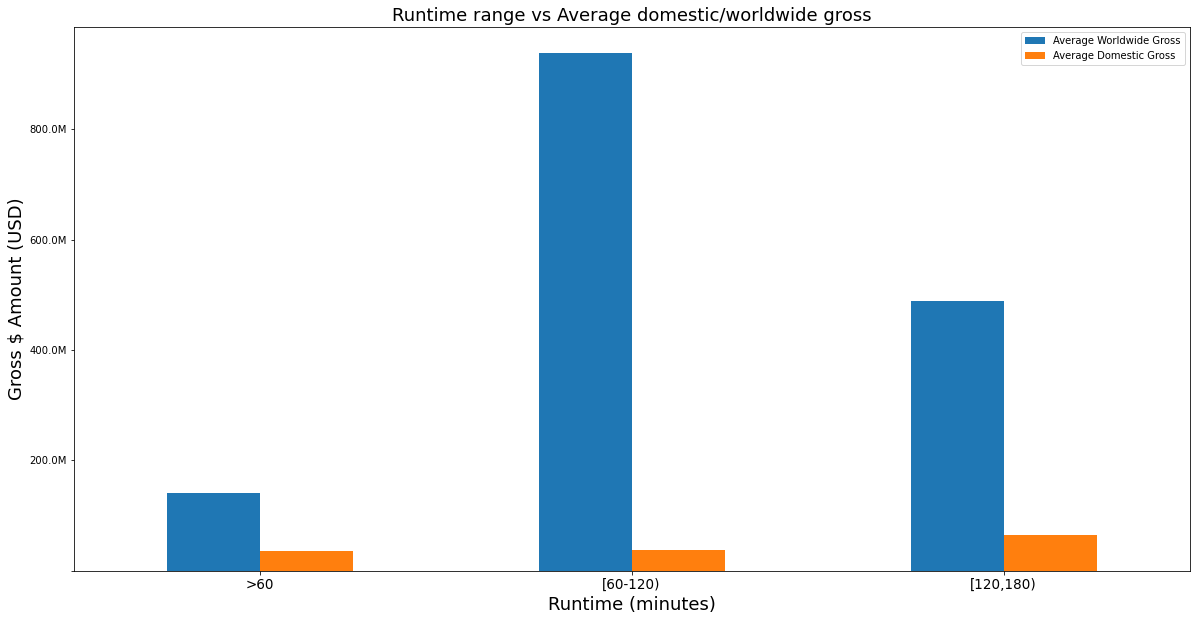

In [89]:
viz.run_avg(avg_world,avg_dom,index)

#### __Rating__

The rating of the movie also can help gurantee that profits are made. This makes sense because
PG-13 movies are more likely to be appealing to all ages.

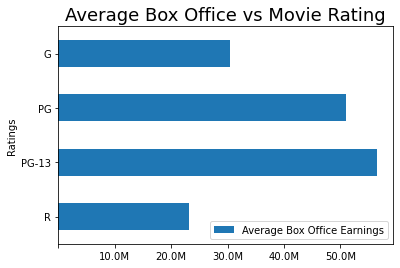

In [90]:
 viz.rating_bar(r,pg_13,pg,g)

# __Conclusions__

This analysis leads to three business recommendations for creating a profitable movie at Microsoft Studios:

 __Make the production budget at least 200M.__ While this does not guarantee a successful movie, people are drawn toward higher quality films more often than not.

 __Make the movie 60-120 minutes long.__ 
 
 __Make family friendly movies. i.e rated PG-13 or PG.__ This will result in a higher box office because there is a larger target audience.


# Future Work

Further analyses could yield additional insights to further improve operations at Microsoft Studios:

- __Repeating the results from above but based on genre would give insight into which genres Microsoft  should invest  in__ 



- __An investigation into the relationship between actors involved in the movies and the gross revenue would provide Microsoft an informed recommendation about who to cast.__ 
